In [21]:
from keras.models import load_model
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [22]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [23]:
df_test = pd.read_csv('/content/gdrive/MyDrive/7mo semestre/Deep Learning/test_mod.csv')

In [24]:
df_test=df_test[['label','text']]
df_test = df_test.dropna(subset=['text'])
df_test['label'].astype(np.int64)
df_test['text'].astype(str)

0         despite fact played small portion game music h...
1         bought charger jul worked ok design nice conve...
2         check maha energys website powerex mhcf charge...
3         reviewed quite bit combo players hesitant due ...
4         also began incorrect disc problems ive read vc...
                                ...                        
399994    bought thomas son huge thomas fan huge set roo...
399995    son recieved birthday gift months ago loved ev...
399996    bought toy son loves thomas toys need one batt...
399997    compilation wide range mitfords articles best ...
399998    dvd disappointment get hoping see substantial ...
Name: text, Length: 399998, dtype: object

In [25]:
#dividimos el data set en varias partes
#test_df=df_test[:100]
test_df=df_test[100:200]
#test_df=df_test[200:300]
test_1=df_test[200:210]
test_2=df_test[210:215]


In [26]:
print(test_df['label'].value_counts())

1    56
0    44
Name: label, dtype: int64


In [27]:
import json

# Cargar el vocabulario desde el archivo guardado (por ejemplo, word_index.json)
with open('/content/gdrive/MyDrive/7mo semestre/Deep Learning/word_index.json', 'r') as f:
    loaded_word_index = json.load(f)

In [28]:

# Crear un nuevo Tokenizer
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)

# Inicializar el Tokenizer con el vocabulario cargado
tokenizer.word_index = loaded_word_index

In [29]:
# Converts texts into strings of numbers
sequences_test = tokenizer.texts_to_sequences(test_df['text'])

In [30]:
sequences_test1 = tokenizer.texts_to_sequences(test_1['text'])
sequences_test2 = tokenizer.texts_to_sequences(test_2['text'])

In [31]:
# Maximum number of tokens in a sequence
max_len = 200
data_test = pad_sequences(sequences_test, maxlen = max_len)

In [32]:
data_1 = pad_sequences(sequences_test1, maxlen = max_len)
data_2 = pad_sequences(sequences_test2, maxlen = max_len)

In [33]:
# Cargar el modelo guardado
loaded_model = load_model('/content/gdrive/MyDrive/7mo semestre/Deep Learning/modelo_entrenado.h5')

In [34]:
# Hacer predicciones con el modelo cargado
predictions = loaded_model.predict(data_test)

# Las predicciones serán en forma de probabilidades, puedes redondearlas si es una clasificación binaria
rounded_predictions = [round(prediction[0]) for prediction in predictions]

#print(rounded_predictions)

4/4 [==============================] - 0s 4ms/step


In [35]:

"""y_true = test_df['label']
y_pred = rounded_predictions  """

def grafica(y_true,y_pred):
  # Calcular la matriz de confusión
  conf_matrix = confusion_matrix(y_true, y_pred)

  # Visualizar la matriz de confusión
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
  plt.xlabel('Predicciones')
  plt.ylabel('Etiquetas Reales')
  plt.title('Matriz de Confusión')
  plt.show()


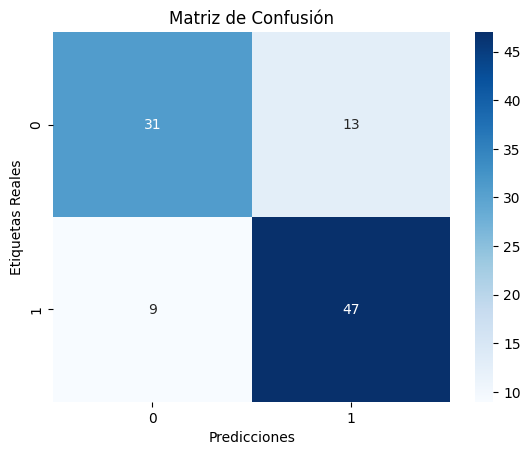

In [36]:
y_true = test_df['label']
y_pred = rounded_predictions
grafica(y_true,y_pred)

In [37]:
# Calcular el porcentaje de precisión
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 78.00%


In [38]:
# Hacer predicciones con el modelo cargado
predictions = loaded_model.predict(data_2)
rounded_predictions = [round(prediction[0]) for prediction in predictions]


1/1 [==============================] - 0s 22ms/step


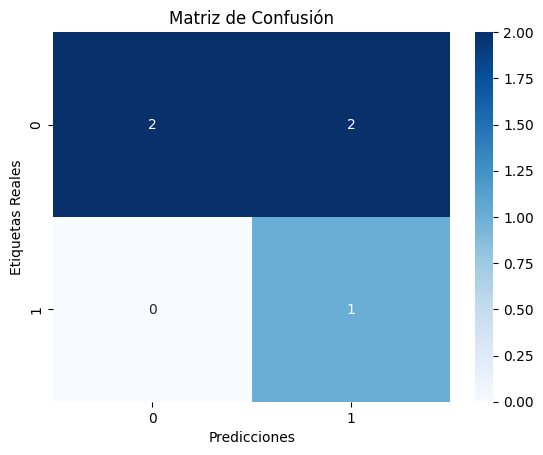

In [39]:
y_true = test_2['label']
y_pred = rounded_predictions
grafica(y_true,y_pred)

In [40]:
# Calcular el porcentaje de precisión
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 60.00%


In [42]:
# Supongamos que tienes nuevos textos en una lista llamada new_texts
new_texts = ["really good product, i do not like the color but it work fine", "It was the best day of my life, and then I found this magical product that does incredible stuff", "it was that bad, like very very very bad"]

# Convertir los nuevos textos en secuencias de números usando el Tokenizer cargado
sequences_new_texts =tokenizer.texts_to_sequences(new_texts)

# Pad secuencias para que tengan la misma longitud que las utilizadas durante el entrenamiento
padded_sequences = pad_sequences(sequences_new_texts, maxlen=max_len)

# Hacer predicciones con el modelo cargado
predictions = loaded_model.predict(padded_sequences)

# Las predicciones serán en forma de probabilidades, puedes redondearlas si es una clasificación binaria
rounded_predictions = [round(prediction[0]) for prediction in predictions]

# Imprimir las predicciones
print(rounded_predictions)

1/1 [==============================] - 0s 34ms/step
[1, 1, 0]
